# AutoInsurance Coding Exercise - 40
## Sairam Tangirala

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC



In [ ]:
#ST-2: until multi-collenearity
#ST-3: dropping predictors based on missing %, high VIF, etc
#sT-4 adding negative signs to ($) column, changed cell format in excel file

In [17]:
df = pd.read_csv('exercise_40_train.csv')

In [18]:
print(df.shape)
print(df.info())
df

(40000, 101)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(87), int64(3), object(11)
memory usage: 30.8+ MB
None


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.01%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.01%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8.00E-06,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.01%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.01%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.593480,19.628352,Sun,0.794697,-0.825849,0.608774,-0.01%,2.183834,3.202119,...,-1.640259,5.051545,no,5.798509,NaN,10.854903,9.505529,1,yes,98.855726
39996,0,1.708685,17.132638,Thursday,-2.676659,1.153851,0.465905,0.01%,-0.048613,3.989567,...,-0.195783,2.020510,no,5.285345,-1.408117,8.867221,9.077493,0,yes,101.880335
39997,0,1.704132,17.824399,Monday,-0.581360,NaN,0.467339,-0.02%,0.904643,2.975563,...,-0.071581,6.250353,no,4.729509,-1.118486,12.244620,7.663763,1,yes,100.022536
39998,0,3.963408,20.285597,Tuesday,0.430116,0.050189,1.821565,1.00E-06,-0.401259,-0.247649,...,-1.248535,8.928009,no,6.803781,NaN,9.876172,8.644538,0,yes,109.460219


In [19]:
def truncate_weekdays():
    temp = df['x3'].str.slice(0,3)
    df.drop('x3', axis = 1, inplace = True)
    df['x3']= temp 
    return

In [20]:
truncate_weekdays()

In [21]:
df.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,x3
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.01%,0.220784,1.816481,1.171788,...,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338,Wed
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.01%,1.192441,3.513950,1.419900,...,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645,Fri
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,-8.00E-06,0.952323,0.782974,-1.247022,...,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215,Thu
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.01%,-0.520756,1.825586,2.223038,...,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970,Tue
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,0.01%,-0.732739,2.151990,-0.275406,...,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935,Sun


In [22]:
df['x19'] = df['x19'].astype(float)
df['x19'].head(20)

0     -908.65
1    -1864.96
2     -543.19
3     -182.63
4      967.01
5      271.16
6      749.97
7       32.75
8     1079.84
9    -1668.78
10    1391.30
11   -1822.86
12    1038.63
13    -377.50
14     581.35
15    -903.43
16    1658.04
17   -1036.27
18      83.86
19    -424.55
Name: x19, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F95634E688>,
      dtype=object)

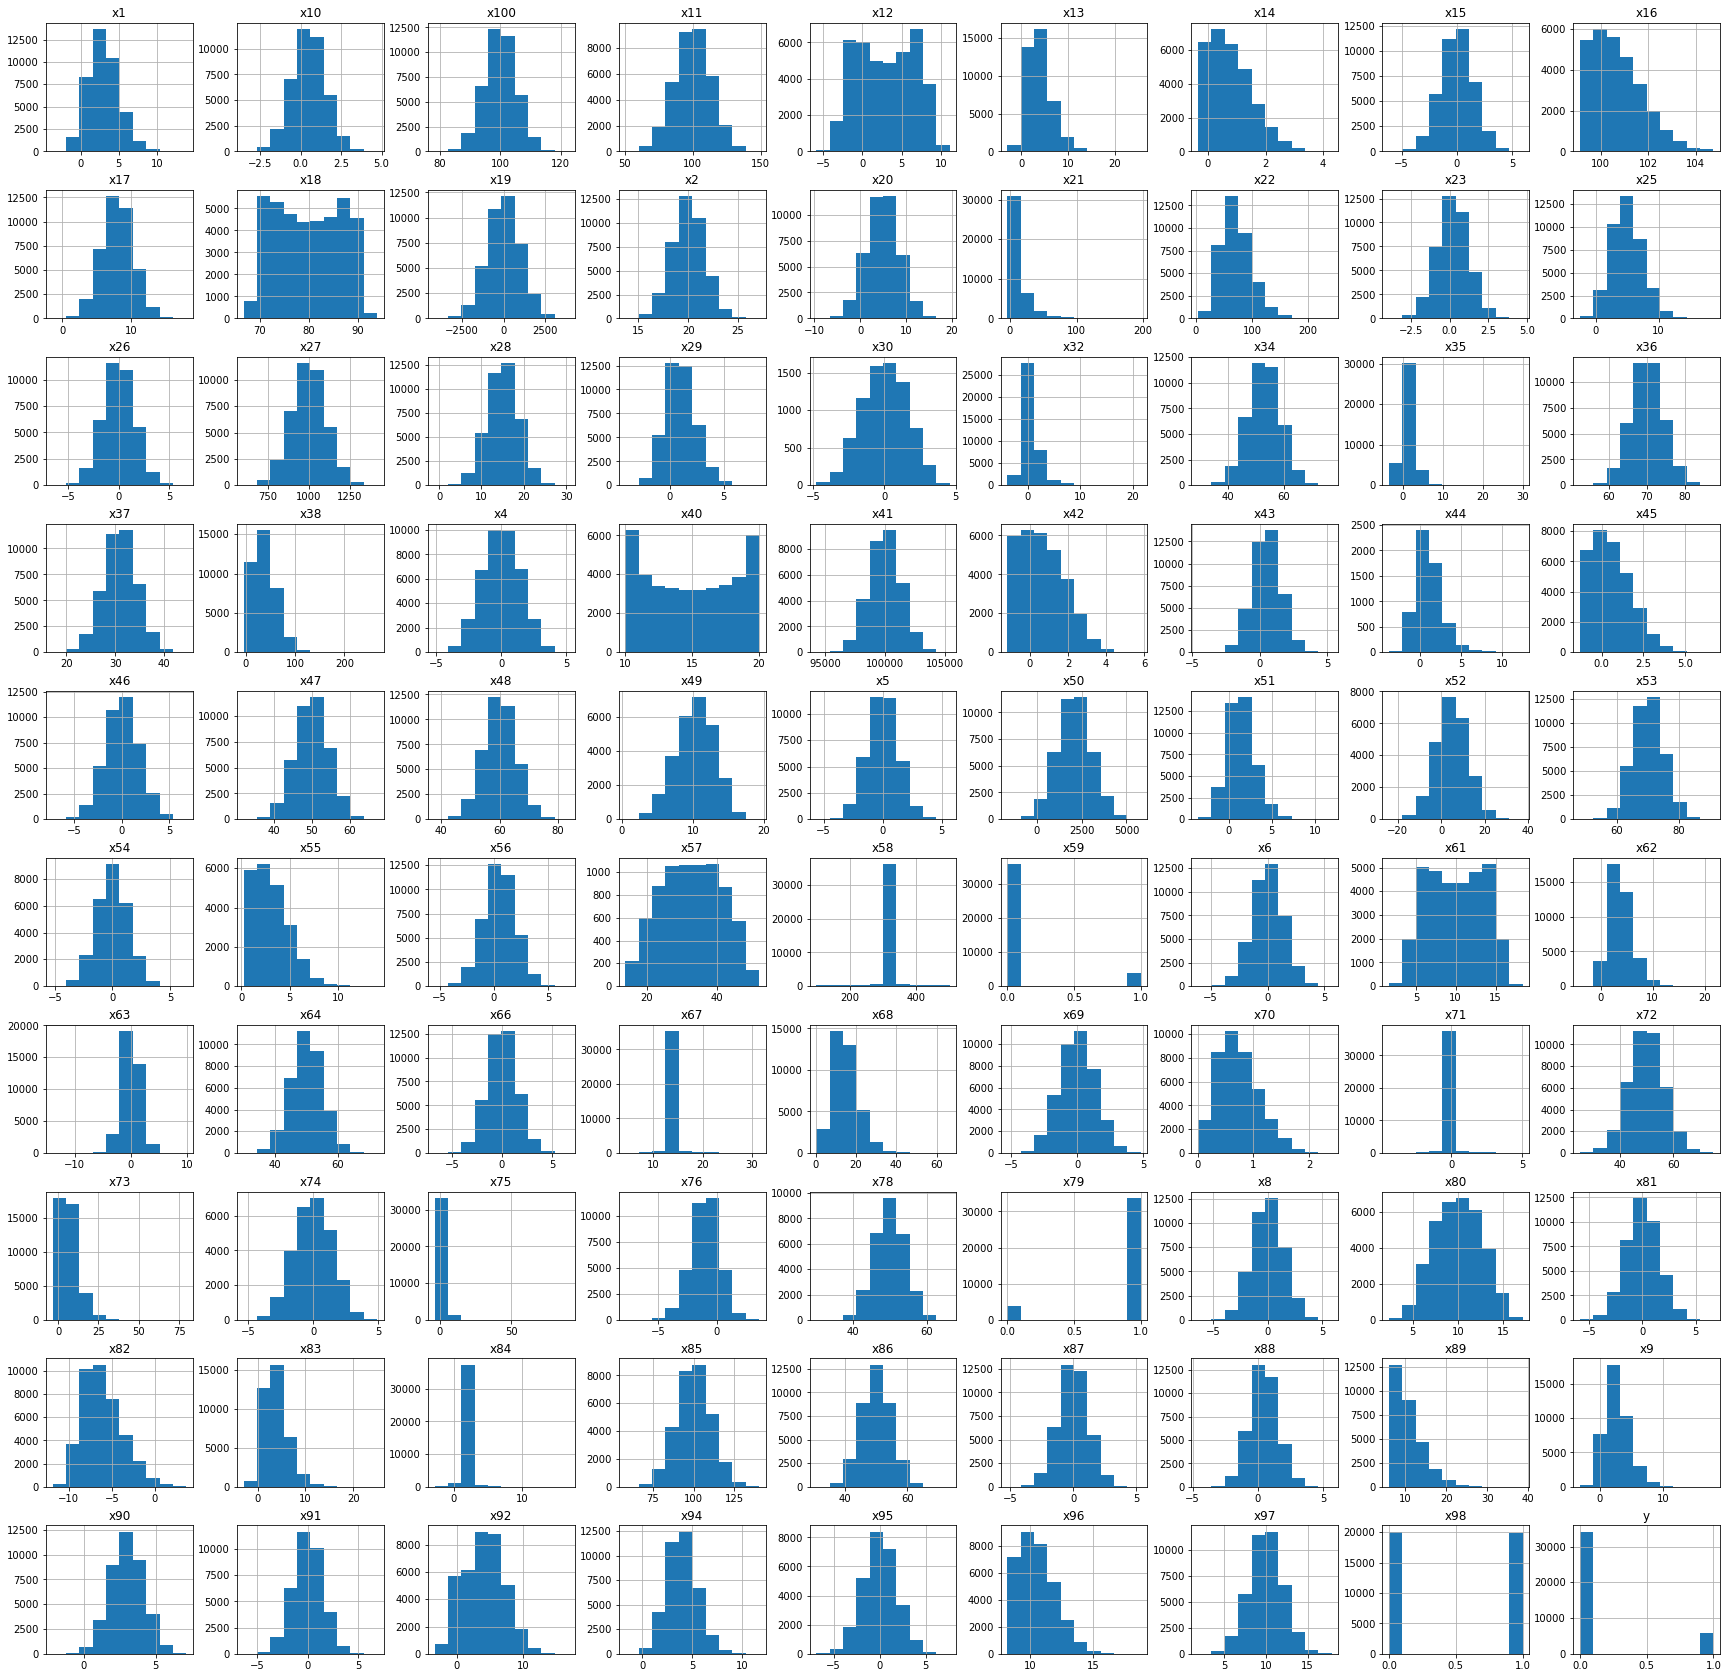

In [28]:
df.hist(figsize=(30,30))

In [29]:
'''
•	Using histogram of predictors,
•	Deleting ‘x39’ column as it has only one value = 5-10 miles
o	Deleting ‘x58’ column as it has a very high peak at 300.63 and its variation does not seem to determine the target
o	Deleting ‘x67’ column as it has a very high peak at 14.40 and its variation does not seem to determine the target
o	Deleting ‘x71’ column as it has a very high peak at -0.00023 and its variation does not seem to determine the target
o	Deleting ‘x75’ column as it has a very high peak around 0 and its variation does not seem to determine the target
o	Deleting ‘x84’ column as it has a very high peak at 2.13 and its variation does not seem to determine the target
o	Deleting ‘x98’ column as it is binary 0/1 and its variation does not seem to determine the target
'''
df.drop('x39', axis=1, inplace=True)
df.drop('x58', axis=1, inplace=True)
df.drop('x67', axis=1, inplace=True)
df.drop('x71', axis=1, inplace=True)
df.drop('x75', axis=1, inplace=True)
df.drop('x84', axis=1, inplace=True)
df.drop('x98', axis=1, inplace=True)

df.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x99,x100,x3
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,0.01%,0.220784,1.816481,1.171788,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,yes,104.251338,Wed
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,0.01%,1.192441,3.513950,1.419900,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,yes,101.230645,Fri
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,-8.00E-06,0.952323,0.782974,-1.247022,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,yes,109.345215,Thu
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,-0.01%,-0.520756,1.825586,2.223038,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,yes,103.021970,Tue
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,0.01%,-0.732739,2.151990,-0.275406,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,yes,92.925935,Sun


In [30]:
#Keeping only alphanumeric characters in data frame
def clean_df():
    for (columnName, columnData) in df.iteritems():
        df[columnName] = df[columnName].replace('[^a-zA-Z0-9 ]', '', regex=True)

In [31]:
clean_df()
df.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x99,x100,x3
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,001,0.220784,1.816481,1.171788,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,yes,104.251338,Wed
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,001,1.192441,3.513950,1.419900,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,yes,101.230645,Fri
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,800E06,0.952323,0.782974,-1.247022,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,yes,109.345215,Thu
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,001,-0.520756,1.825586,2.223038,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,yes,103.021970,Tue
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,001,-0.732739,2.151990,-0.275406,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,yes,92.925935,Sun


## Removing columns with >20% missing data

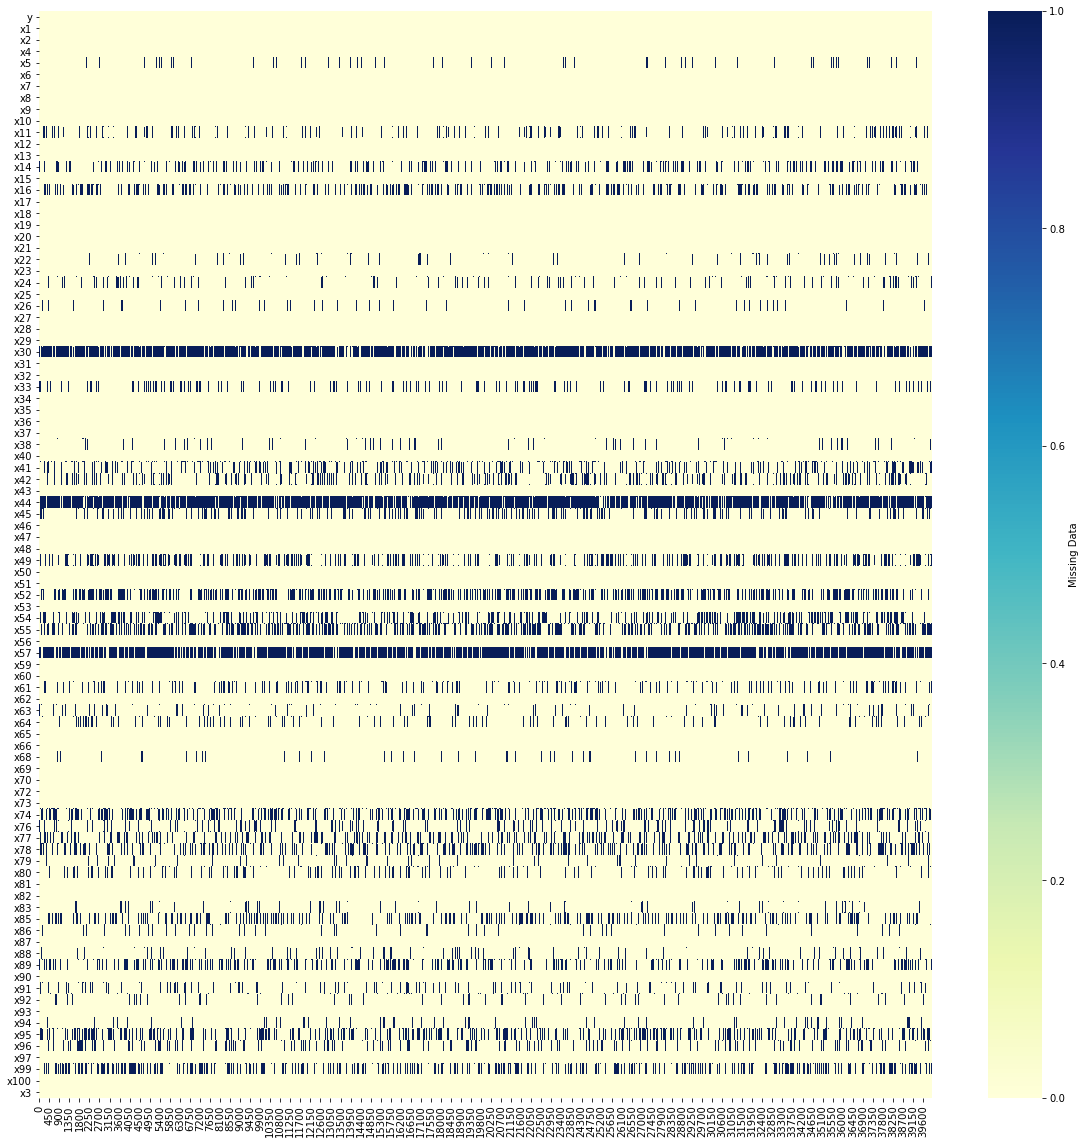

In [32]:
#Visualizing missing data in given train file
plt.figure(figsize=(20,20))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


In [34]:
def miss_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100

        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    
    return missing_data 

In [35]:
missing_df = miss_data(df)
missing_df


,column_name,missing_data,missing_in_percentage
0,y,0,0.000
1,x1,0,0.000
2,x2,0,0.000
3,x4,0,0.000
4,x5,2428,6.070
...,...,...,...
89,x96,6638,16.595
90,x97,0,0.000
91,x99,12836,32.090
92,x100,0,0.000


Data columns that have > 20 missing data:['x14', 'x16', 'x30', 'x41', 'x42', 'x44', 'x45', 'x49', 'x52', 'x54', 'x55', 'x57', 'x74', 'x77', 'x78', 'x85', 'x89', 'x95', 'x99']


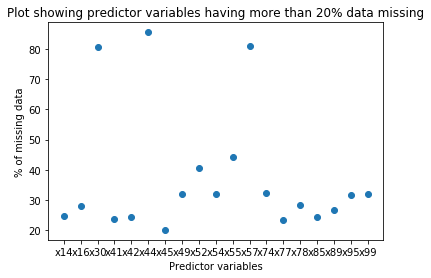

In [41]:
#plt.figure(figsize=(20,20))
x_axis = []
y_axis = []
for row in range(1,len(missing_df)):
    if missing_df['missing_in_percentage'][row]>20.0:
        x_axis.append(missing_df.column_name[row])
        y_axis.append(missing_df.missing_in_percentage[row])
    
plt.scatter(x_axis,y_axis)
plt.xlabel("Predictor variables")
plt.ylabel("% of missing data")
plt.title("Plot showing predictor variables having more than 20% data missing")
print('Data columns that have > 20 missing data:{}'.format(x_axis))

In [42]:
df.drop('x14', axis=1, inplace=True)
df.drop('x16', axis=1, inplace=True)
df.drop('x30', axis=1, inplace=True)
df.drop('x41', axis=1, inplace=True)
df.drop('x42', axis=1, inplace=True)
df.drop('x44', axis=1, inplace=True)
df.drop('x45', axis=1, inplace=True)
df.drop('x49', axis=1, inplace=True)
df.drop('x52', axis=1, inplace=True)
df.drop('x54', axis=1, inplace=True)
df.drop('x55', axis=1, inplace=True)
df.drop('x57', axis=1, inplace=True)
df.drop('x74', axis=1, inplace=True)
df.drop('x77', axis=1, inplace=True)
df.drop('x78', axis=1, inplace=True)
df.drop('x85', axis=1, inplace=True)
df.drop('x89', axis=1, inplace=True)
df.drop('x95', axis=1, inplace=True)
df.drop('x99', axis=1, inplace=True)

df.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x88,x90,x91,x92,x93,x94,x96,x97,x100,x3
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,001,0.220784,1.816481,1.171788,...,1.079562,2.770844,-0.397427,0.909479,no,5.492487,10.255579,7.627730,104.251338,Wed
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,001,1.192441,3.513950,1.419900,...,1.223852,3.703013,0.656651,9.093466,no,3.346429,NaN,10.505284,101.230645,Fri
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,800E06,0.952323,0.782974,-1.247022,...,-0.353469,3.997183,2.059615,0.305170,no,4.456565,8.754572,7.810979,109.345215,Thu
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,001,-0.520756,1.825586,2.223038,...,1.761266,2.933707,0.899392,5.971782,no,4.100022,NaN,9.178325,103.021970,Tue
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,001,-0.732739,2.151990,-0.275406,...,-0.952377,2.922302,3.003595,1.046096,yes,3.234033,9.987006,11.702664,92.925935,Sun


Text(0.5, 1.0, 'Data Frequency for CompanyName')

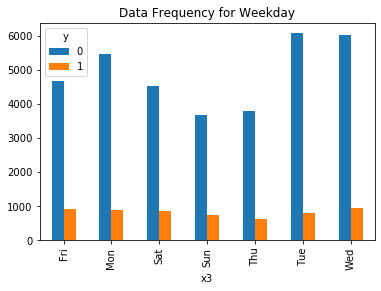

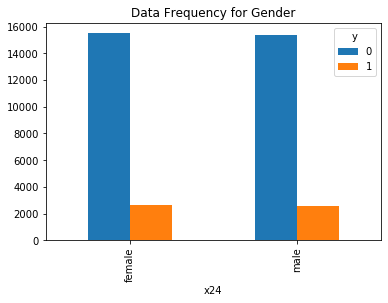

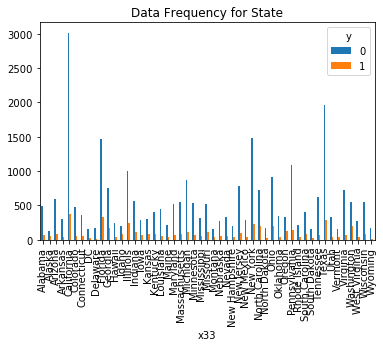

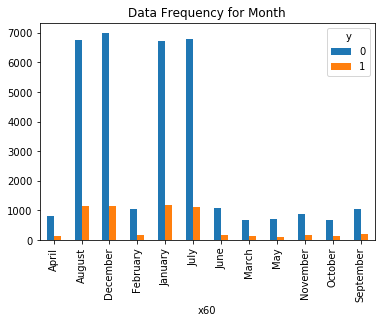

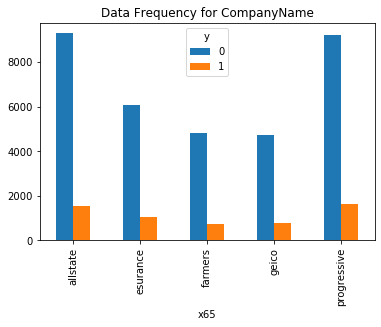

In [44]:
#x3 = weekday
#x24: gender
#x33: state
#x39: 5-10 miles
#X60: month
#x65: insurance company name
#x77: car make

pd.crosstab(df.x3, df.y).plot(kind = 'bar')
plt.title("Data Frequency for Weekday")

pd.crosstab(df.x24, df.y).plot(kind = 'bar')
plt.title("Data Frequency for Gender")

pd.crosstab(df.x33, df.y).plot(kind = 'bar')
plt.title("Data Frequency for State")

pd.crosstab(df.x60, df.y).plot(kind = 'bar')
plt.title("Data Frequency for Month")

pd.crosstab(df.x65, df.y).plot(kind = 'bar')
plt.title("Data Frequency for CompanyName")



## Creating MetaData DataFrame for Reference

In [45]:
#Creating Metadata DataFrame so that it will be easy to handle and manipulate data during data exploration steps

#role: input, ID, target
#level: nominal, interval, ordinal, binary
#keep: True or False
#dtype: int, float, str

MetaData = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype'])
data =[]
for columns in df.columns:
    
    #Defining Role
    
    if columns == 'y':
        role = 'target'
    else:
        role = 'input'
        
    #Defining DataTypes
    
    dtype = df[columns].dtype
    
    #Defining keep
    
    keep = True
    
    #Defining Level
#y = target, x24 = male/female, x31 = yes/no,  x59 = 0/1 , x79 = 0/1  , x93 = yes/no, x98 0/1
    if columns == 'y' or columns == 'x24' or columns == 'x31' or columns == 'x59' or columns == 'x79' or columns == 'x93' or columns == 'x98' :
        level = 'binary'
    elif df[columns].dtype == object:
        level = 'categorical'
    elif df[columns].dtype == float:
        level = 'interval'
    elif df[columns].dtype == int:
        level = 'ordinal'
        print('ordinal column name:{}'.format(df[columns]))#No ordinal data
        
        
    f_dict = {
        'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    
    data.append(f_dict)

MetaData = MetaData.append(data)

print(MetaData)

   variable    role        level  keep    dtype
0         y  target       binary  True    int64
1        x1   input     interval  True  float64
2        x2   input     interval  True  float64
3        x4   input     interval  True  float64
4        x5   input     interval  True  float64
..      ...     ...          ...   ...      ...
70      x94   input     interval  True  float64
71      x96   input     interval  True  float64
72      x97   input     interval  True  float64
73     x100   input     interval  True  float64
74       x3   input  categorical  True   object

[75 rows x 5 columns]


In [46]:
#Distribution of variables along the levels in MetaData dataframe
print(MetaData.groupby('level')[['variable']].count())

             variable
level                
binary              6
categorical         5
interval           64


## Imputing NA values for numeric data columns

In [53]:
#For numeric columns replace NA with column mean
counter = 0
for row in range(0,len(MetaData)):
    if (MetaData.level[row] == 'interval') and df[MetaData.variable[row]].isna().sum()>=1:
            try:
                df[MetaData.variable[row]] = df[MetaData.variable[row]].fillna(int(np.mean(df[MetaData.variable[row]])))
                counter+=1
            except ValueError:
                pass
    else:
        continue

print("A total of {} NAs were replaced".format(counter))


A total of 0 NAs were replaced


In [54]:
print(df.isna())

           y     x1     x2     x4     x5     x6     x7     x8     x9    x10  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
39995  False  False  False  False  False  False  False  False  False  False   
39996  False  False  False  False  False  False  False  False  False  False   
39997  False  False  False  False  False  False  False  False  False  False   
39998  False  False  False  False  False  False  False  False  False  False   
39999  False  False  False  False  False  False  False  False  False  False   

       ...    x88    x90    x91    x92    x93    x9

## Checking for correlations between a pair of data columns

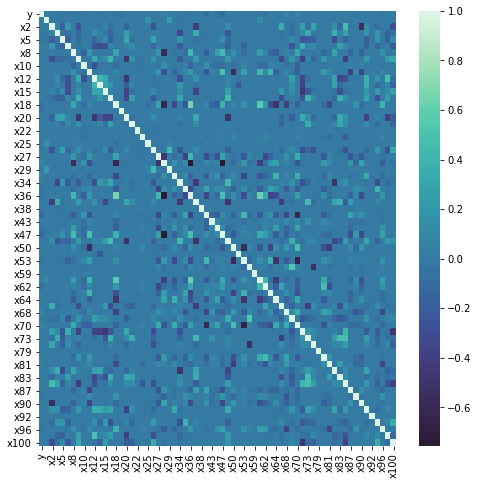

In [56]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data = corr, annot = False, cmap ='mako', center = 0)

In [85]:
numeric_columns = []
for row in range(1,len(MetaData)):
    if (MetaData.level[row] == 'interval'):
        numeric_columns.append(MetaData.variable[row])
print('interval data columns:{}'.format(numeric_columns))
numeric_df = df.loc[:,numeric_columns]
print(numeric_df)


interval data columns:['x1', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x15', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x29', 'x32', 'x34', 'x35', 'x36', 'x37', 'x38', 'x40', 'x43', 'x46', 'x47', 'x48', 'x50', 'x51', 'x53', 'x56', 'x61', 'x62', 'x63', 'x64', 'x66', 'x68', 'x69', 'x70', 'x72', 'x73', 'x76', 'x80', 'x81', 'x82', 'x83', 'x86', 'x87', 'x88', 'x90', 'x91', 'x92', 'x94', 'x96', 'x97', 'x100']
             x1         x2        x4        x5        x6        x8         x9  \
0      0.165254  18.060003  1.077380 -1.339233 -1.584341  0.220784   1.816481   
1      2.441471  18.416307  1.482586  0.920817 -0.759931  1.192441   3.513950   
2      4.427278  19.188092  0.145652  0.366093  0.709962  0.952323   0.782974   
3      3.925235  19.901257  1.763602 -0.251926 -0.827461 -0.520756   1.825586   
4      2.868802  22.202473  3.405119  0.083162  1.381504 -0.732739   2.151990   
...         ...        ...       ...       ...   

## MultiCollinearity present in several predictors

In [86]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [87]:
vif_data = calc_vif(numeric_df)
display(vif_data)


,variables,VIF
0,x1,3.835182
1,x2,1556.253141
2,x4,1.783138
3,x5,2.024917
4,x6,2.223058
...,...,...
59,x92,2.878864
60,x94,27.536710
61,x96,104.528276
62,x97,67.909295


17


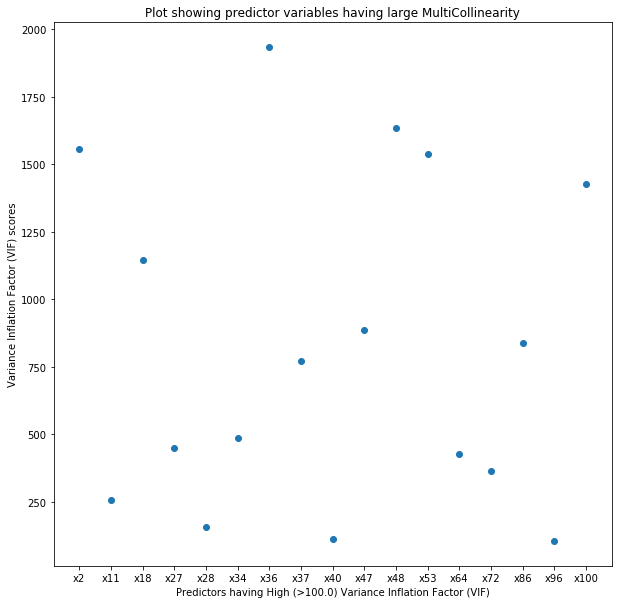

In [91]:
plt.figure(figsize=(10,10))
x_axis = []
y_axis = []
for row in range(1,len(vif_data)):
    if vif_data['VIF'][row]>100.0:
        x_axis.append(vif_data.variables[row])
        y_axis.append(vif_data.VIF[row])
    
plt.scatter(x_axis,y_axis)
plt.xlabel("Predictors having High (>100.0) Variance Inflation Factor (VIF)")
plt.ylabel("Variance Inflation Factor (VIF) scores")
plt.title("Plot showing predictor variables having large MultiCollinearity")

print(len(x_axis))


In [92]:
print(len(x_axis))

17


## Removing MultiCollinear predictors

In [94]:
list_low_VIF_columnName = []
list_low_VIF_columnData = []
vif_data['VIF'] = vif_data['VIF'].astype(float)

for i in range(0,len(vif_data)):
    #print('columnName:{}',vif_data['variables'][i])
    #print('columnData:{}',vif_data['VIF'][i])
    if(vif_data['VIF'][i] <100.0):
        list_low_VIF_columnName.append(vif_data['variables'][i])
        list_low_VIF_columnData.append(vif_data['VIF'][i])

print(len(list_low_VIF_columnName))
#print(list_low_VIF_columnData)
df_low_VIF = numeric_df[list_low_VIF_columnName]
print(f'The dataset has {df_low_VIF.shape[0]} rows and {df_low_VIF.shape[1]} columns.')            


47
The dataset has 40000 rows and 47 columns.


In [95]:
df.head()

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x88,x90,x91,x92,x93,x94,x96,x97,x100,x3
0,0,0.165254,18.060003,1.077380,-1.339233,-1.584341,001,0.220784,1.816481,1.171788,...,1.079562,2.770844,-0.397427,0.909479,no,5.492487,10.255579,7.627730,104.251338,Wed
1,1,2.441471,18.416307,1.482586,0.920817,-0.759931,001,1.192441,3.513950,1.419900,...,1.223852,3.703013,0.656651,9.093466,no,3.346429,10.000000,10.505284,101.230645,Fri
2,1,4.427278,19.188092,0.145652,0.366093,0.709962,800E06,0.952323,0.782974,-1.247022,...,-0.353469,3.997183,2.059615,0.305170,no,4.456565,8.754572,7.810979,109.345215,Thu
3,0,3.925235,19.901257,1.763602,-0.251926,-0.827461,001,-0.520756,1.825586,2.223038,...,1.761266,2.933707,0.899392,5.971782,no,4.100022,10.000000,9.178325,103.021970,Tue
4,0,2.868802,22.202473,3.405119,0.083162,1.381504,001,-0.732739,2.151990,-0.275406,...,-0.952377,2.922302,3.003595,1.046096,yes,3.234033,9.987006,11.702664,92.925935,Sun


## Dropping 17 numeric columns that displayed high multi-collinearity (VIF score)

In [99]:
for i in range(1,len(df.columns)):
    if (df.columns[i] not in df_low_VIF):
        print('column:{} has high VIF. Dropping this column'.format(df.columns[i]))
        df.drop(df.columns[i], axis=1, inplace=True)
        

column:x2 has high VIF. Dropping this column
column:x7 has high VIF. Dropping this column
column:x11 has high VIF. Dropping this column
column:x18 has high VIF. Dropping this column
column:x24 has high VIF. Dropping this column
column:x27 has high VIF. Dropping this column
column:x31 has high VIF. Dropping this column
column:x33 has high VIF. Dropping this column
column:x36 has high VIF. Dropping this column
column:x40 has high VIF. Dropping this column
column:x47 has high VIF. Dropping this column
column:x53 has high VIF. Dropping this column
column:x59 has high VIF. Dropping this column
column:x64 has high VIF. Dropping this column
column:x72 has high VIF. Dropping this column
column:x79 has high VIF. Dropping this column
column:x86 has high VIF. Dropping this column
column:x93 has high VIF. Dropping this column
column:x96 has high VIF. Dropping this column
column:x100 has high VIF. Dropping this column


IndexError: index 55 is out of bounds for axis 0 with size 55

In [100]:
df

,y,x1,x4,x5,x6,x8,x9,x10,x12,x13,...,x82,x83,x87,x88,x90,x91,x92,x94,x97,x3
0,0,0.165254,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,4.644568,4.814885,...,-3.261865,0.085710,-0.162668,1.079562,2.770844,-0.397427,0.909479,5.492487,7.627730,Wed
1,1,2.441471,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,1.459868,1.443983,...,-4.789183,4.684722,1.252022,1.223852,3.703013,0.656651,9.093466,3.346429,10.505284,Fri
2,1,4.427278,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,1.098525,1.216059,...,-6.387984,2.506272,0.657292,-0.353469,3.997183,2.059615,0.305170,4.456565,7.810979,Thu
3,0,3.925235,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,-1.390239,3.962961,...,-5.431998,3.285291,2.066346,1.761266,2.933707,0.899392,5.971782,4.100022,9.178325,Tue
4,0,2.868802,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,7.230125,3.877312,...,-5.664815,3.395916,0.663113,-0.952377,2.922302,3.003595,1.046096,3.234033,11.702664,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.593480,0.794697,-0.825849,0.608774,2.183834,3.202119,-0.723356,4.784491,0.221237,...,-6.751673,3.594673,-0.209108,-0.821945,3.017092,-1.640259,5.051545,5.798509,9.505529,Sun
39996,0,1.708685,-2.676659,1.153851,0.465905,-0.048613,3.989567,1.468074,3.682934,3.581121,...,-6.584895,1.274211,0.029031,-0.021201,4.406889,-0.195783,2.020510,5.285345,9.077493,Thu
39997,0,1.704132,-0.581360,0.000000,0.467339,0.904643,2.975563,0.228908,1.141497,2.859400,...,-7.505579,0.501725,0.041528,-1.258134,4.537489,-0.071581,6.250353,4.729509,7.663763,Mon
39998,0,3.963408,0.430116,0.050189,1.821565,-0.401259,-0.247649,-0.499294,-0.627155,-0.403161,...,-7.408004,4.919613,0.498621,-0.046309,4.724964,-1.248535,8.928009,6.803781,8.644538,Tue


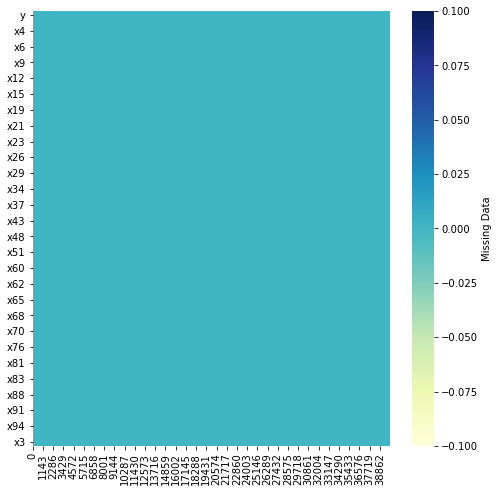

In [101]:
#Visualizing missing data after pre-processing
plt.figure(figsize=(8,8))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


## One-Hot Encoding of categorical data

In [110]:
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'x3' column 
weekdays_df = pd.DataFrame(encoder.fit_transform(df[['x3']]).toarray())
weekdays_df.set_axis(["Sun", "Mon", "Tue", "Wed", "Thu", 'Fri', 'Sat'], axis = 1)
weekdays_df.columns = ["Sun", "Mon", "Tue", "Wed", "Thu", 'Fri', 'Sat']
print(weekdays_df.head())

months_df = pd.DataFrame(encoder.fit_transform(df[['x60']]).toarray())
months_df.set_axis(['January','February','March','April','May','June','July','August','September','October','November','December'], axis = 1)
months_df.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
print(months_df.head())

companys_df = pd.DataFrame(encoder.fit_transform(df[['x65']]).toarray())
companys_df.set_axis(["farmers", "allstate", "geico",'progressive','esurance'], axis = 1)
companys_df.columns = ["farmers", "allstate", "geico",'progressive','esurance']
print(companys_df.head())



   Sun  Mon  Tue  Wed  Thu  Fri  Sat
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0
   January  February  March  April  May  June  July  August  September  \
0      0.0       1.0    0.0    0.0  0.0   0.0   0.0     0.0        0.0   
1      1.0       0.0    0.0    0.0  0.0   0.0   0.0     0.0        0.0   
2      0.0       0.0    0.0    0.0  0.0   0.0   0.0     0.0        0.0   
3      0.0       0.0    0.0    0.0  0.0   0.0   0.0     0.0        0.0   
4      0.0       0.0    0.0    0.0  1.0   0.0   0.0     0.0        0.0   

   October  November  December  
0      0.0       0.0       0.0  
1      0.0       0.0       0.0  
2      0.0       0.0       1.0  
3      0.0       0.0       1.0  
4      0.0       0.0       0.0  
   farmers  allstate  geico  progressive  esurance
0      0.0       0.0    1.0          0.0       0.0
1      1.0       0.0    0.0      

In [111]:
#merge one-hot encoded columns back with original DataFrame
df = df.join(weekdays_df)
df.drop('x3', axis=1, inplace=True)
len(df.columns)

#merge one-hot encoded columns back with original DataFrame
df = df.join(months_df)
df.drop('x60', axis=1, inplace=True)
len(df.columns)

#merge one-hot encoded columns back with original DataFrame
df = df.join(companys_df)
df.drop('x65', axis=1, inplace=True)
len(df.columns)


76

## ML Models

In [113]:
# Creating new df with no multi-collinearity
X = df.drop('y', axis = 1)
Y = df['y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
#The distribution of observations in the target class is skewed (imbalanced data)
counter = Counter(Y_train)
print(counter)

Counter({0: 27334, 1: 4666})


## Feature Scaling 


In [115]:
# Creating StandardScaler instance
sc = StandardScaler()

# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)
# Scaling data
X_test = sc.transform(X_test)

In [117]:
X_train

array([[-1.66806491,  1.00374861, -0.79650259, ..., -0.40111399,
        -0.40205845,  1.63033094],
       [ 1.08219398, -0.14385622, -0.07812288, ..., -0.40111399,
        -0.40205845, -0.6133724 ],
       [ 0.80198339,  0.43158767, -0.40818446, ..., -0.40111399,
        -0.40205845, -0.6133724 ],
       ...,
       [-0.22667893, -0.69675255, -0.88216729, ..., -0.40111399,
         2.48720056, -0.6133724 ],
       [-0.02934398, -1.72165239, -0.56418877, ..., -0.40111399,
        -0.40205845, -0.6133724 ],
       [-0.14440995,  0.97449967, -0.12627839, ..., -0.40111399,
        -0.40205845, -0.6133724 ]])

## Sampling

In [118]:
# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

#The distribution of observations in the target class is skewed (imbalanced data)
counter = Counter(Y_train)
print(counter)

Counter({0: 27334, 1: 27334})


In [123]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.50,0.75,1.0],'random_state':[0]}])
               ]
               

In [132]:
grid_models = [(RandomForestClassifier(),[{'n_estimators':[100,150],'criterion':['gini','entropy'],'random_state':[0]}])
               ]


In [ ]:
'''
grid_models = [
               (DecisionTreeClassifier(),[{'criterion':['gini'],'random_state':[0]}])
               ]
'''

In [133]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, Y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

RandomForestClassifier():
Best Accuracy : 89.57%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 150, 'random_state': 0}

----------------



# Logistic Regression

              precision    recall  f1-score   support

           0       0.90      0.60      0.72      6863
           1       0.19      0.58      0.29      1137

    accuracy                           0.59      8000
   macro avg       0.54      0.59      0.50      8000
weighted avg       0.80      0.59      0.66      8000

ROC AUC score: 0.6249338254884418
Accuracy Score:  0.593875


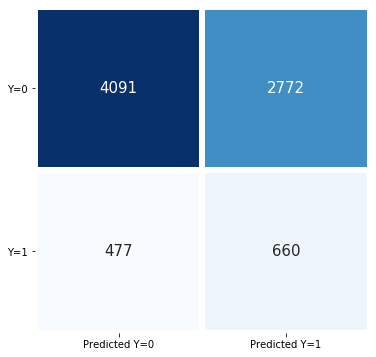

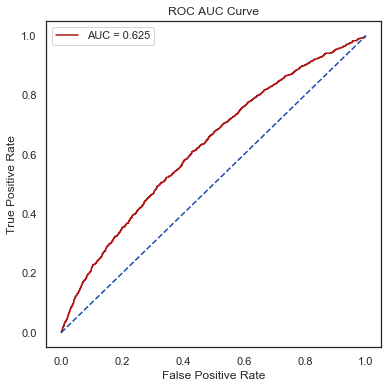

C:\Users\stangira\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

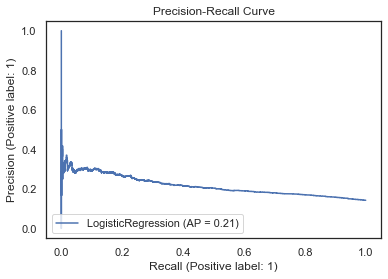

In [125]:
#Fitting Logistic Regression Model
accuracies = {}
classifier = LogisticRegression(C= 0.75, random_state= 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))
print(f'ROC AUC score: {roc_auc_score(Y_test, Y_prob)}')
print('Accuracy Score: ',accuracy_score(Y_test, Y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Y=0', 'Y=1'], xticklabels = ['Predicted Y=0', 'Predicted Y=1'])
plt.yticks(rotation = 0)
plt.show()

#accuracy
acc = accuracy_score(Y_test, Y_pred)*100
accuracies['Logistic Regression'] = acc

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(Y_test, Y_prob)
disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plt.title('Precision-Recall Curve')
plt.show()

classifier_LR = classifier

In [129]:
classifier_LR

In [126]:
df

,y,x1,x4,x5,x6,x8,x9,x10,x12,x13,...,August,September,October,November,December,farmers,allstate,geico,progressive,esurance
0,0,0.165254,1.077380,-1.339233,-1.584341,0.220784,1.816481,1.171788,4.644568,4.814885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2.441471,1.482586,0.920817,-0.759931,1.192441,3.513950,1.419900,1.459868,1.443983,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,4.427278,0.145652,0.366093,0.709962,0.952323,0.782974,-1.247022,1.098525,1.216059,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,3.925235,1.763602,-0.251926,-0.827461,-0.520756,1.825586,2.223038,-1.390239,3.962961,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,2.868802,3.405119,0.083162,1.381504,-0.732739,2.151990,-0.275406,7.230125,3.877312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.593480,0.794697,-0.825849,0.608774,2.183834,3.202119,-0.723356,4.784491,0.221237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39996,0,1.708685,-2.676659,1.153851,0.465905,-0.048613,3.989567,1.468074,3.682934,3.581121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39997,0,1.704132,-0.581360,0.000000,0.467339,0.904643,2.975563,0.228908,1.141497,2.859400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39998,0,3.963408,0.430116,0.050189,1.821565,-0.401259,-0.247649,-0.499294,-0.627155,-0.403161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Random Forest

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6863
           1       0.25      0.11      0.15      1137

    accuracy                           0.83      8000
   macro avg       0.56      0.53      0.53      8000
weighted avg       0.78      0.83      0.80      8000

ROC AUC score: 0.6575303870922187
Accuracy Score:  0.8285


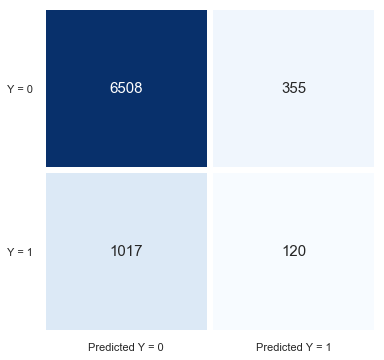

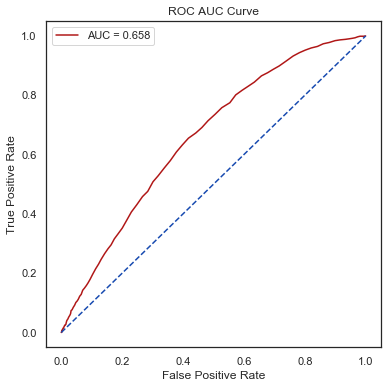

C:\Users\stangira\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


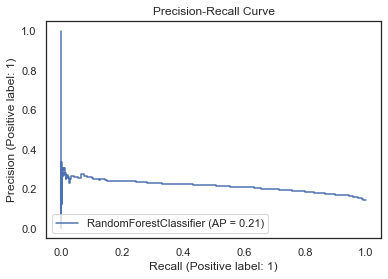

In [135]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 150, random_state= 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))
print(f'ROC AUC score: {roc_auc_score(Y_test, Y_prob)}')
print('Accuracy Score: ',accuracy_score(Y_test, Y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Y = 0', 'Y = 1'], xticklabels = ['Predicted Y = 0', 'Predicted Y = 1'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

#accuracy
acc = accuracy_score(Y_test, Y_pred)*100
accuracies['Random Forest'] = acc



sns.set(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(Y_test, Y_prob)
disp = plot_precision_recall_curve(classifier, X_test, Y_test)
plt.title('Precision-Recall Curve')
plt.show()

classifier_RF = classifier

In [136]:
classifier_RF

RandomForestClassifier(n_estimators=150, random_state=0)

In [137]:
import pickle

In [138]:
# save the model to disk
pickle.dump(classifier_LR, open('classifier_LR.pkl', 'wb'))
pickle.dump(classifier_RF, open('classifier_RF.pkl', 'wb'))

# Comparing Models

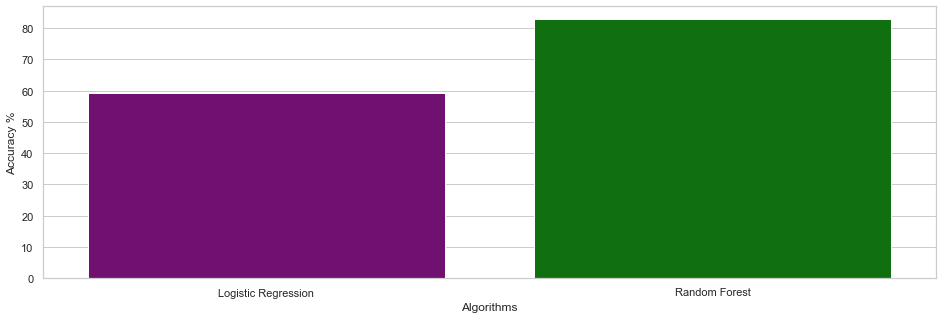

In [139]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [140]:
df_tuned = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_tuned.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_tuned

,Model,Accuracy
1,Random Forest,82.8500
0,Logistic Regression,59.3875


# End of Code